<a href="https://colab.research.google.com/github/Vikry99/Final_Project/blob/main/Final_Project_Anaconda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import LibraRy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, AffinityPropagation, Birch
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Vikry99/dataset/3faa50a057e69164d00206a45606f42f509a13ff/Europe%20Hotel%20Booking%20Satisfaction%20Score.csv')
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


# Cleaning Data

In [ ]:
df.head(5)

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Hotel wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival convenience,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Hotel location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Stay comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0
Common Room entertainment,103904.0,3.358158,1.332991,0.0,2.00,4.0,4.00,5.0
Checkin/Checkout service,103904.0,3.304290,1.265396,0.0,3.00,3.0,4.00,5.0


# Exploratory Data Analyst

Shape

In [ ]:
df.shape[0]

103904

In [ ]:
df.shape[1]

17

Missing Value ?

In [ ]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Gender,103904,2,Female,52727
purpose_of_travel,103904,5,tourism,32053
Type of Travel,103904,2,Group Travel,71655
Type Of Booking,103904,3,Group bookings,49665
satisfaction,103904,2,neutral or dissatisfied,58879


### Value Detail about Type of Booking

In [ ]:
print(df['Type Of Booking'].value_counts())
print(df['Type Of Booking'].value_counts(normalize=True))

Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64
Group bookings       0.477989
Individual/Couple    0.449886
Not defined          0.072124
Name: Type Of Booking, dtype: float64


Insight dari data diatas :
1. all Type of Booking data includes Group bookings, Individual/couple and Not defined
2. The percentage of Group of Bookings occupies the highest data at 47.79%
3. The percentage of Individual/Couple ranks second at 44.98%
4. Not Define ranks third at 7.21%
5. By obtaining this data, the Type of Booking with Individual/Couple is given a promo or a more simplified ordering system

In [ ]:
xd= df[df['Type Of Booking'].apply(lambda x: x.startswith('Not defined'))].index
df = df.drop(xd)
df = df.reset_index(drop=True)
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
1,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
2,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
3,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
4,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied


In [ ]:
df.shape

(96410, 17)

Any duplicat again ?

In [ ]:
df["id"].duplicated().sum()

0

In [ ]:
# Set the style of the plots
sns.set(style="ticks")


## BARCHART BY OBJECT CATEGORY AND VALUE CATEGORY

### SATISFACTION BY AGE CATEGORY

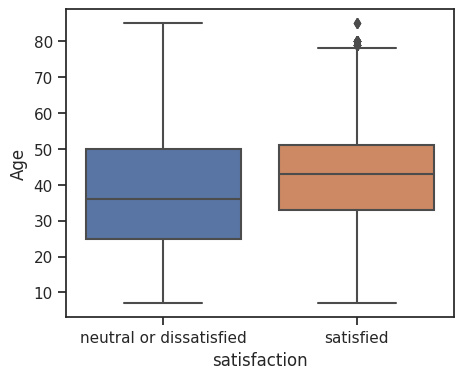

In [ ]:
# Create subplots for multiple plots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

# Plot the relationships between satisfaction and other variables
sns.boxplot(x="satisfaction", y="Age", data=df)

# Display the plots
plt.show()

BoxPlot means, Satisfied by age devide in above 40 years dan Neutral or dissatisfied devide in below 40 years

### SATISFACTION BY GENDER CATEGORY

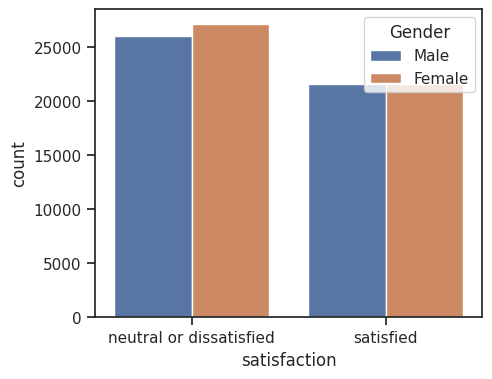

In [ ]:
# Create subplots for multiple plots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

# Plot the relationships between satisfaction and other variables
sns.countplot(x="satisfaction", hue="Gender", data=df)

# Display the plots
plt.show()

Insight from barchart above:
Satisfied by Gender devide Male and Female are 50:50. But for neutral and dissatisfied female customer got the highest level

3. We are focusing on neutral or dissatisfied in all category. For example Hotel location got highest 3 point.
4. So for the next step we consider to maintain facility to get to the hotel more easier dan prepare accomodation.

### SATISFACTION BY TYPE OF TRAVEL CATEGORY

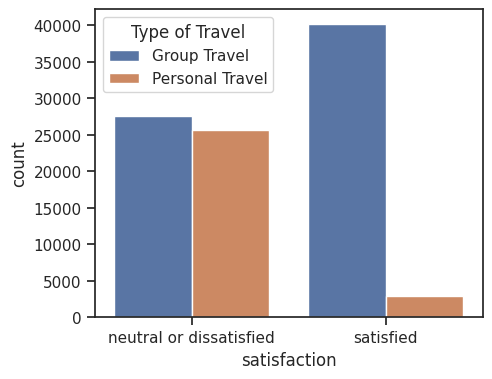

In [ ]:
# Create subplots for multiple plots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

# Plot the relationships between satisfaction and other variables
sns.countplot(x="satisfaction", hue="Type of Travel", data=df)

# Display the plots
plt.show()

Insight : Satisfied customer category by Type Of travel got the highest value by Group of travel and neutral or dissatisfied got 60:40 on Group Travel and personal travel.

### SATISFACTION BY PURPOSE OF TRAVEL CATEGORY AND CORRELATION WITH HOTEL LOCATION


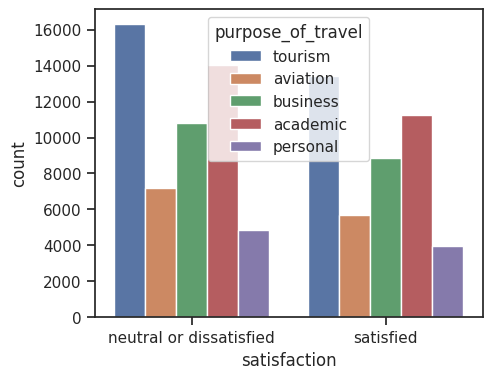

In [ ]:
# Create subplots for multiple plots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

# Plot the relationships between satisfaction and other variables
sns.countplot(x="satisfaction", hue="purpose_of_travel", data=df)

# Display the plots
plt.show()

positive things about this barchart is most customers satisfied with purpose of travel category for tourism and academic. so Next we're gonna look Hotel Location why academic got the second place.

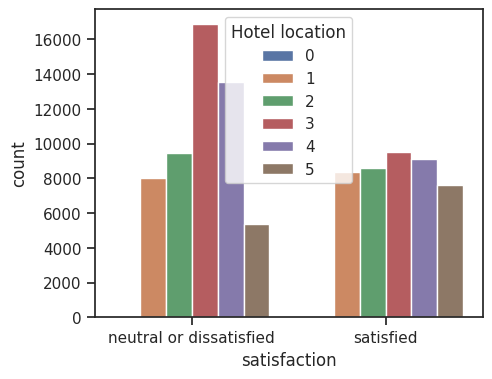

In [ ]:
# Create subplots for multiple plots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

# Plot the relationships between satisfaction and other variables
sns.countplot(x="satisfaction", hue="Hotel location", data=df)

# Display the plots
plt.show()

Value category for Hotel location got the highest value at 3 point. so the summarize between Hotel location and purpose of travel by academic means the location near by education institute or school is plus value for sales and marketing needed.

# PREPROCESSING

## Encode data
One hot encode

In [ ]:
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
1,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
2,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
3,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
4,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied


In [ ]:
def age_category(age):
  if age < 40:
    return "Young"
  elif age > 60:
    return "Old"
  else:
    return "Middle"

df['age_category'] = df['Age'].apply(lambda age: age_category(age))

def ohe (df_,variable,top_x_labels):
  for label in top_x_labels:
    df_[variable + '_' + label] = np.where(df[variable]==label,1,0)

# Purpose_of_travel
oh = [x for x in df['purpose_of_travel'].value_counts().sort_values(ascending=False).head().index]
ohe(df,'purpose_of_travel',oh)
df = df.drop(['purpose_of_travel'], axis=1)

# Type_of_travel
oh = [x for x in df['Type of Travel'].value_counts().sort_values(ascending=False).head().index]
ohe(df,'Type of Travel',oh)
df = df.drop(['Type of Travel'], axis=1)

# Type_of_booking
oh= [x for x in df['Type Of Booking'].value_counts().sort_values(ascending=False).head().index]
ohe(df,'Type Of Booking',oh)
df = df.drop(['Type Of Booking'], axis=1)

df = df.drop(['age_category'], axis=1)


df.head()

,id,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,...,satisfaction,purpose_of_travel_tourism,purpose_of_travel_academic,purpose_of_travel_business,purpose_of_travel_aviation,purpose_of_travel_personal,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple
0,5047,Male,25,3,2,3,3,1,1,1,...,neutral or dissatisfied,1,0,0,0,0,1,0,1,0
1,110028,Female,26,2,2,2,2,5,5,5,...,satisfied,1,0,0,0,0,1,0,1,0
2,24026,Female,25,2,5,5,5,2,2,2,...,neutral or dissatisfied,1,0,0,0,0,1,0,1,0
3,119299,Male,61,3,3,3,3,4,5,3,...,satisfied,0,0,0,1,0,1,0,1,0
4,111157,Female,26,3,4,2,1,1,1,1,...,neutral or dissatisfied,0,0,1,0,0,0,1,0,1


## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = df.select_dtypes(include=['object']).columns.to_list()

label_encoding = LabelEncoder()

#encode the data into a label
for i in columns:
  df[i] = label_encoding.fit_transform(df[i])

In [ ]:
df.head()

,id,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,...,satisfaction,purpose_of_travel_tourism,purpose_of_travel_academic,purpose_of_travel_business,purpose_of_travel_aviation,purpose_of_travel_personal,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple
0,5047,1,25,3,2,3,3,1,1,1,...,0,1,0,0,0,0,1,0,1,0
1,110028,0,26,2,2,2,2,5,5,5,...,1,1,0,0,0,0,1,0,1,0
2,24026,0,25,2,5,5,5,2,2,2,...,0,1,0,0,0,0,1,0,1,0
3,119299,1,61,3,3,3,3,4,5,3,...,1,0,0,0,1,0,1,0,1,0
4,111157,0,26,3,4,2,1,1,1,1,...,0,0,0,1,0,0,0,1,0,1


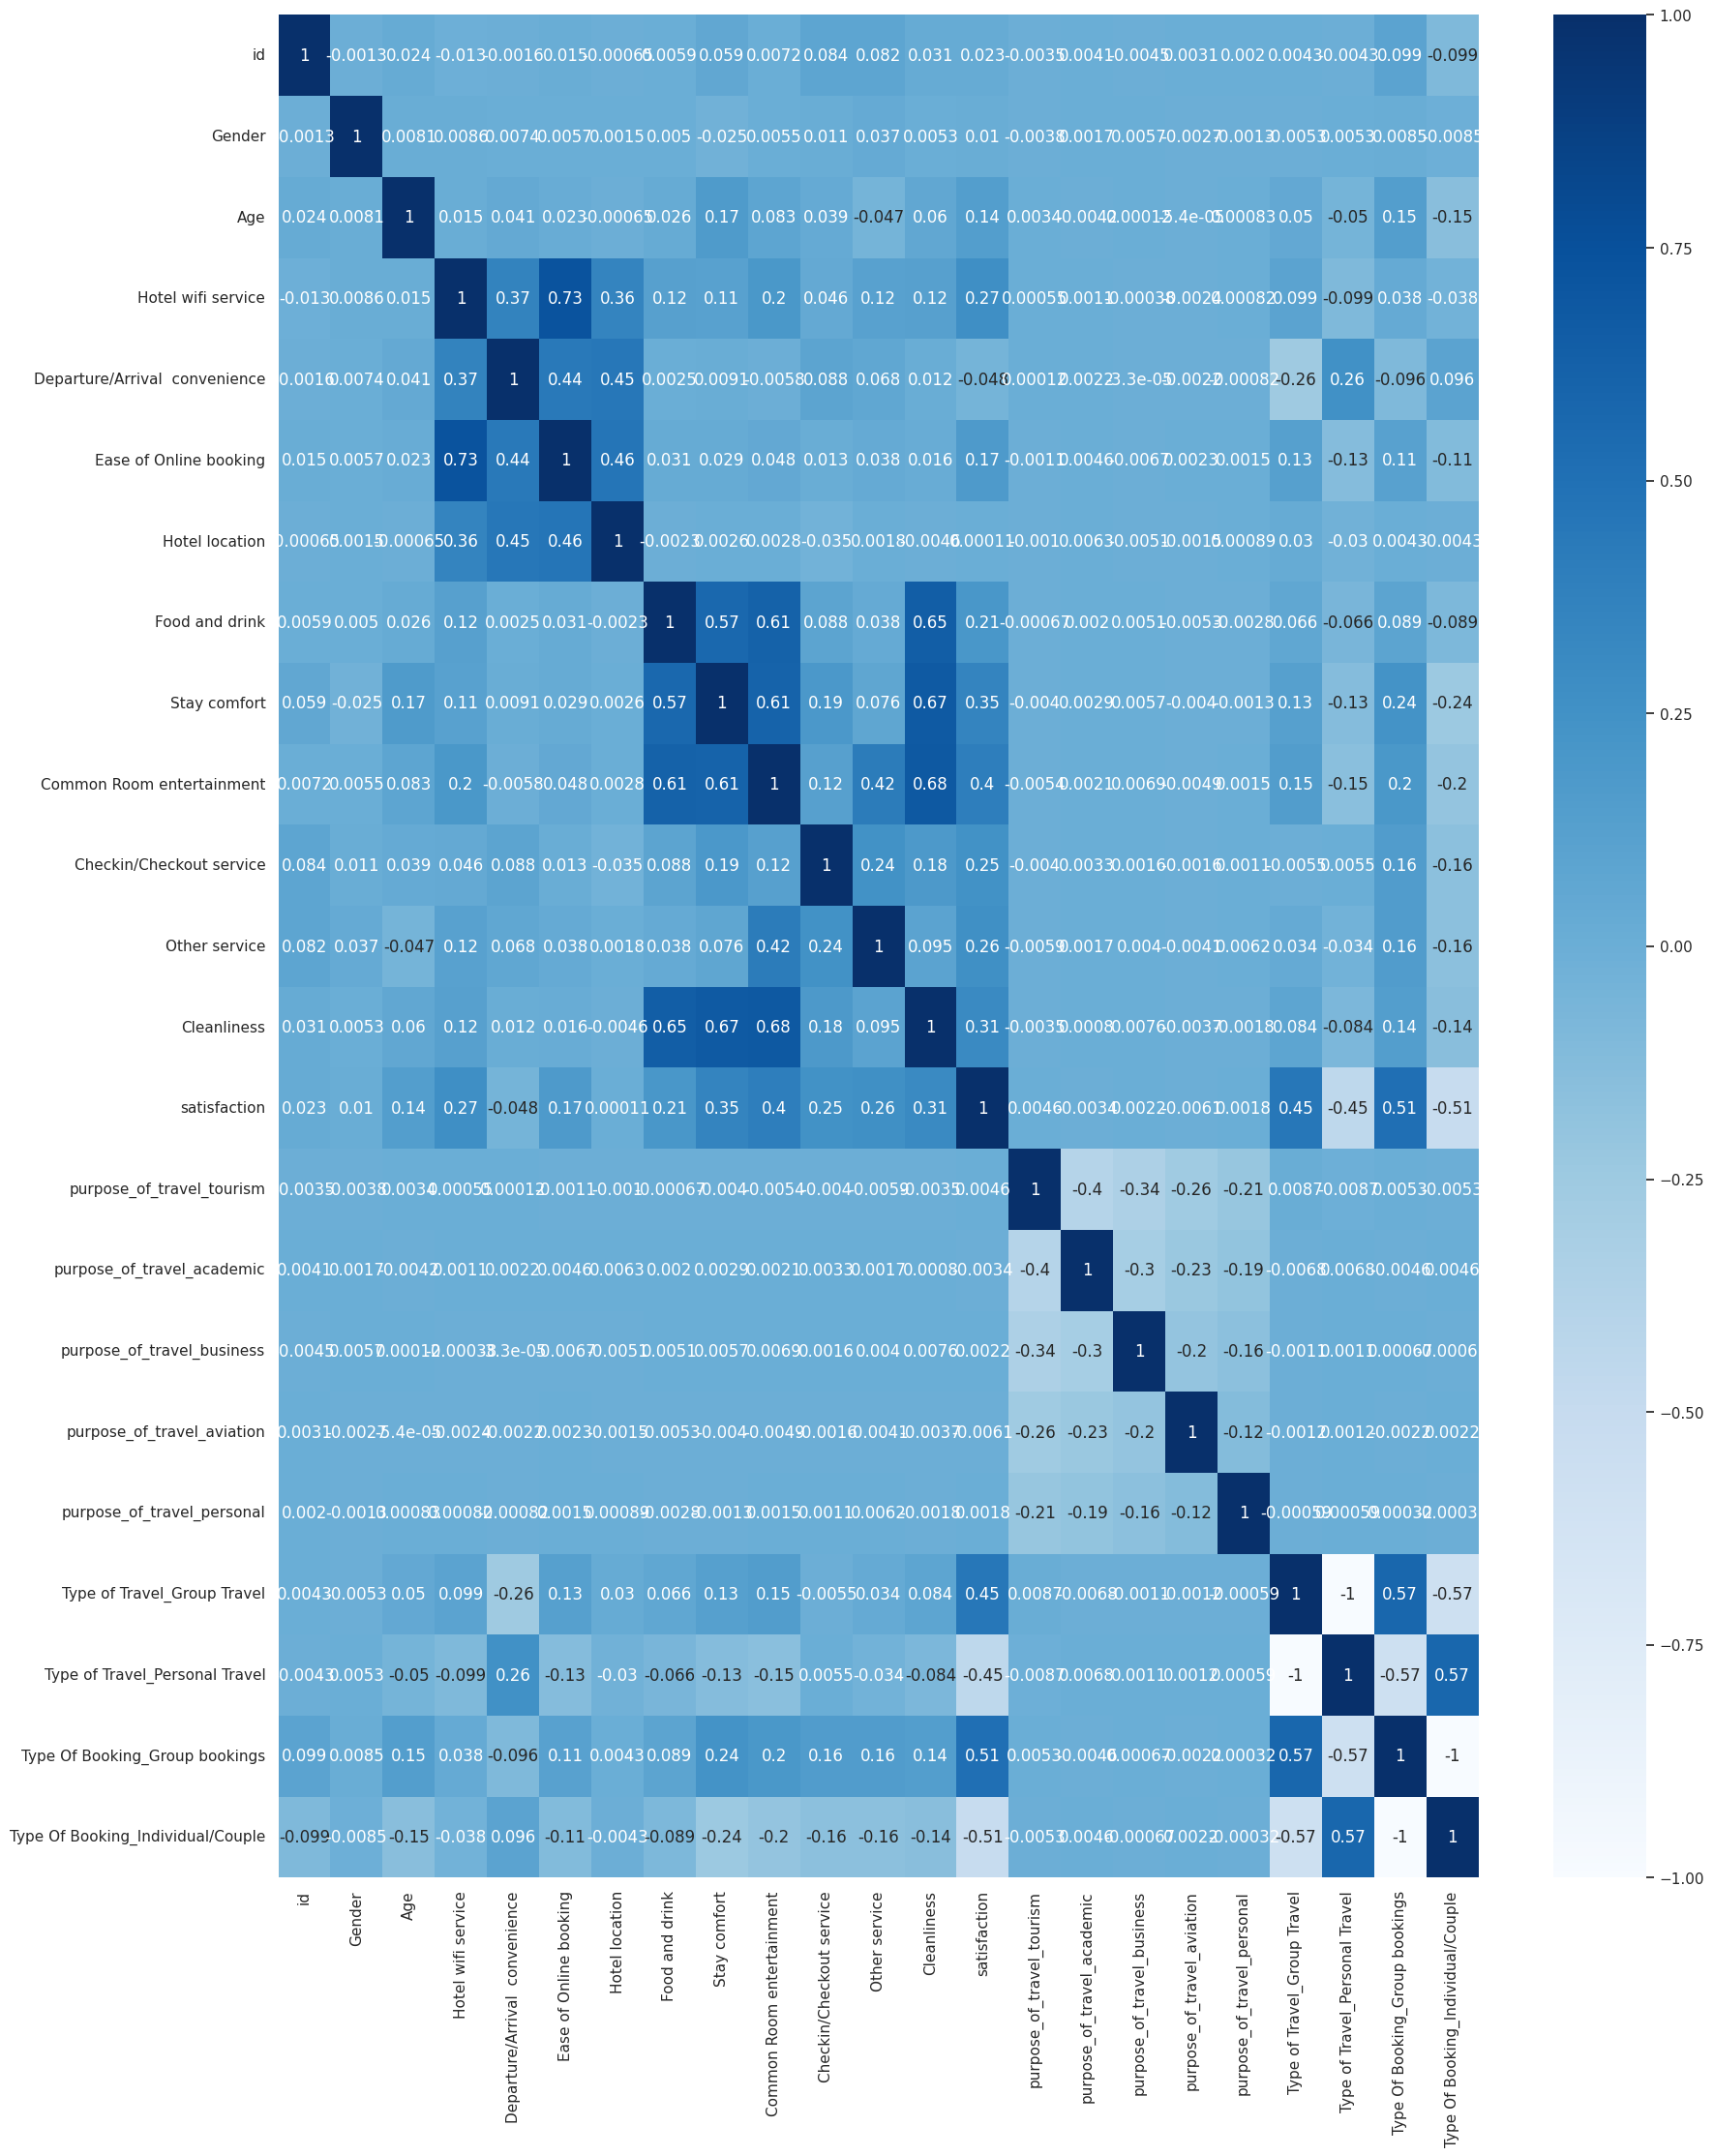

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(20,25))
sns.set(font_scale=1)
sns.heatmap(corr_matrix, annot=True, cmap='Blues',fmt='.2g' )

plt.show()

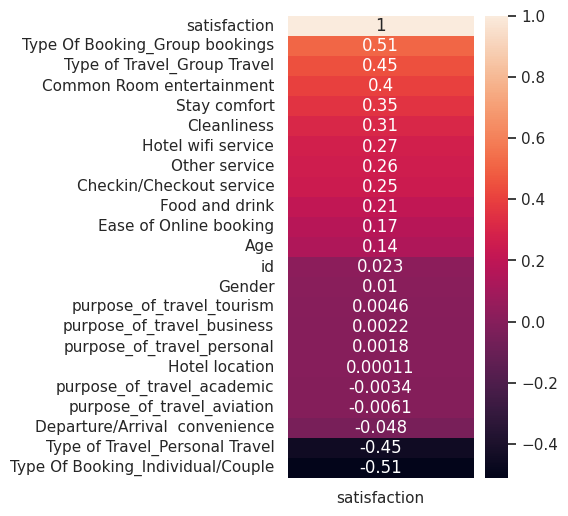

In [ ]:
plt.figure(figsize=(3,6))
sns.heatmap(corr_matrix[['satisfaction']].sort_values(by=['satisfaction'],ascending=False,),annot=True)
plt.show()

The highest correlation hotel satisfaction

1.   Type of booking (Group Booking)
2.   Type of Travel (Group Travel)
3.   Common room entertaiment



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96410 entries, 0 to 96409
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   id                                 96410 non-null  int64
 1   Gender                             96410 non-null  int64
 2   Age                                96410 non-null  int64
 3   Hotel wifi service                 96410 non-null  int64
 4   Departure/Arrival  convenience     96410 non-null  int64
 5   Ease of Online booking             96410 non-null  int64
 6   Hotel location                     96410 non-null  int64
 7   Food and drink                     96410 non-null  int64
 8   Stay comfort                       96410 non-null  int64
 9   Common Room entertainment          96410 non-null  int64
 10  Checkin/Checkout service           96410 non-null  int64
 11  Other service                      96410 non-null  int64
 12  Cleanliness       

# Modelling


***Modelling classification***

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC

# # Divide the data into features (X) and target variable (y)
# X = df.drop('satisfaction', axis=1)
# y = df['satisfaction']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the classifiers
# classifiers = [
#     DecisionTreeClassifier(),
#     KNeighborsClassifier(),
#     GaussianNB(),
#     RandomForestClassifier(),
#     SVC()
# ]

# # Train and evaluate each classifier
# for classifier in classifiers:
#     classifier.fit(X_train, y_train)
#     y_pred = classifier.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(classifier.__class__.__name__, 'accuracy:', accuracy)

DecisionTreeClassifier accuracy: 0.9254745358365315
KNeighborsClassifier accuracy: 0.6762783943574318
GaussianNB accuracy: 0.8009023960170106
RandomForestClassifier accuracy: 0.949486567783425


***Evaluate and choose model***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Divide the data into features (X) and target variable (y)
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.9482418836220309


***Random Forest Classifier***

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Select columns for One-Hot Encoding
columns_to_encode = ["purpose_of_travel", "Type of Travel", "Type Of Booking"]

# Apply One-Hot Encoding to the selected columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# Preprocess the data
X = df_encoded.drop(columns=["satisfaction"])
y = df_encoded["satisfaction"]

# Convert non-numeric columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:
        X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Check for overfitting
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Training Accuracy:", train_accuracy)


Accuracy: 0.9507723401183774
Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.97      0.96     11713
              satisfied       0.95      0.93      0.94      9068

               accuracy                           0.95     20781
              macro avg       0.95      0.95      0.95     20781
           weighted avg       0.95      0.95      0.95     20781

Confusion Matrix:
 [[11312   401]
 [  622  8446]]
Training Accuracy: 1.0


Confusion Matrix

In [ ]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

confusion_df

,Predicted 0,Predicted 1
Actual 0,10240,440
Actual 1,558,8044


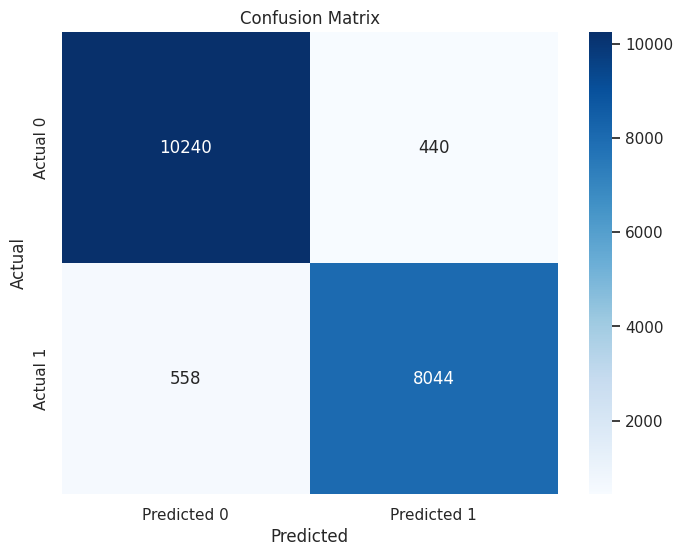

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Calculate feature importances

In [ ]:
feature_scores = pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

Hotel wifi service                   0.177101
Type Of Booking_Group bookings       0.095839
Common Room entertainment            0.077900
Stay comfort                         0.075866
Type Of Booking_Individual/Couple    0.066639
Type of Travel_Group Travel          0.060482
Type of Travel_Personal Travel       0.060440
id                                   0.056961
Age                                  0.054632
Ease of Online booking               0.051461
Other service                        0.041160
Checkin/Checkout service             0.041102
Cleanliness                          0.037407
Hotel location                       0.035876
Departure/Arrival  convenience       0.024545
Food and drink                       0.016390
Gender                               0.006567
purpose_of_travel_tourism            0.004670
purpose_of_travel_academic           0.004497
purpose_of_travel_business           0.004080
purpose_of_travel_aviation           0.003591
purpose_of_travel_personal        

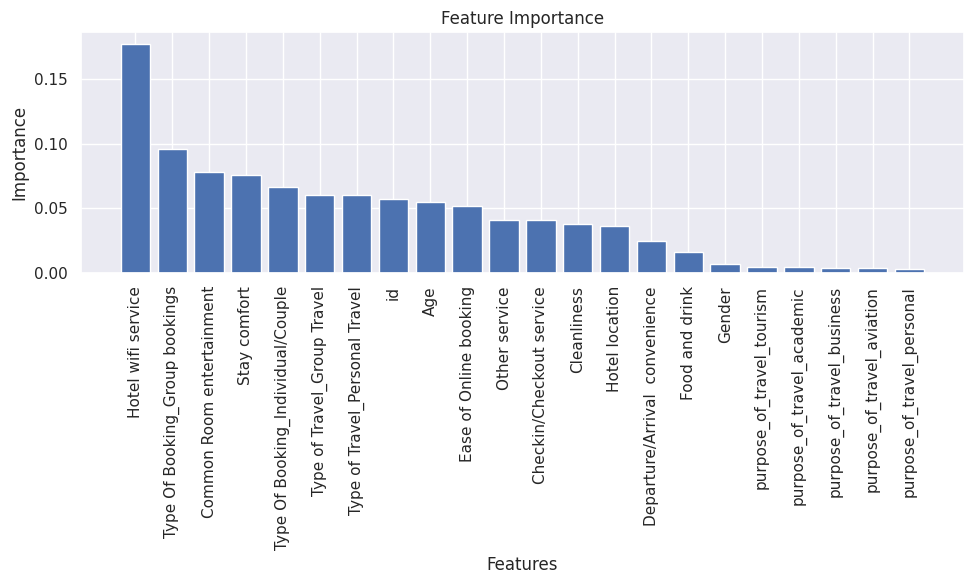

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_scores.index, feature_scores.values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

Based on the feature importance scores obtained from the Random Forest classifier, we can draw some conclusions and make suggestions:

1. The most important features that strongly influence customer satisfaction are:
   - Hotel wifi service
   - Type Of Booking (Group bookings)
   - Common Room entertainment
   - Stay comfort

2. Other significant features that contribute to customer satisfaction include:
   - Type Of Booking (Individual/Couple)
   - Type of Travel (Group Travel)
   - Type of Travel (Personal Travel)
   - Customer ID (id)
   - Age
   - Ease of Online booking

3. Less influential features include cleanliness, hotel location, departure/arrival convenience, food and drink, and gender.

Based on these conclusions, the following suggestions can be made:

1. Focus on improving hotel wifi service: Since it has the highest importance score, enhancing the quality and reliability of the wifi service can significantly impact customer satisfaction.

2. Give attention to group bookings: Group bookings seem to have a significant influence on satisfaction. Special offers, amenities, or tailored services for group bookings can enhance the overall experience for these customers.

3. Prioritize common room entertainment and stay comfort: These features play a crucial role in customer satisfaction. Ensuring enjoyable and engaging entertainment options in common areas and providing comfortable accommodations are key areas to focus on.

4. Pay attention to online booking experience: The ease of online booking has a notable impact on satisfaction. Streamlining the online booking process, ensuring user-friendly interfaces, and providing clear information can enhance the overall experience for customers.

5. Consider age-specific offerings: Age appears to be an important factor, indicating that different age groups may have varying preferences and expectations. Tailoring services and amenities based on age segments can help improve customer satisfaction.

6. Continuously monitor and maintain cleanliness: While cleanliness has a relatively lower importance score, it should not be overlooked. Maintaining a clean and hygienic environment throughout the hotel is essential for ensuring overall customer satisfaction.